In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_cleaned.pkl'))

df = df.dropna()
print(len(df))
df.head()

124717


,pretensao_futura,reprovacao,possui_tv,desempenho_aluno,possui_computador,raca_cor,turno,proficiencia,evasao_escolar_ate_final_ano,id_aluno,...,gosta_estudar_disciplina,disciplina,desempenho_aluno_cat,leitura,frequenta_entretenimento,responsaveis_incentivam,escolaridade_pais,leitura_pais,estuda_regularmente,tempo_extra
26050,2.0,0.0,2.0,Básico,1,2,2,0.261208,0,23065545,...,1.0,MT,1,0.571429,0.25,1.0,2.5,0.5,1.333333,2.0
26051,2.0,0.0,3.0,Básico,1,0,2,-0.637643,0,23065559,...,0.0,LP,1,0.800000,0.50,1.0,2.5,1.0,1.000000,1.5
26058,2.0,0.0,3.0,Insuficiente,1,0,2,-1.805837,0,23065559,...,0.0,MT,0,0.800000,0.50,1.0,2.5,1.0,0.000000,1.5
26059,2.0,0.0,2.0,Proficiente,1,2,2,0.875437,0,23065545,...,0.0,LP,2,0.571429,0.25,1.0,2.5,0.5,1.666667,2.0
26064,0.0,0.0,4.0,Básico,1,1,2,-0.695548,0,23056981,...,1.0,LP,1,1.857143,1.00,1.0,1.5,1.0,1.666667,2.5


In [70]:
#df = df[df['disciplina'] == 'LP']
#print(len(df))

# using median as target

In [71]:
mediana = df['proficiencia'].median()

df['target'] = df['proficiencia'].apply(lambda x: 1 if x >= mediana else 0)

In [72]:
df['target'].value_counts()

target
1    62360
0    62357
Name: count, dtype: int64

In [73]:
df[['proficiencia', 'desempenho_aluno_cat', 'target']].describe()

,proficiencia,desempenho_aluno_cat,target
count,124717.000000,124717.000000,124717.000000
mean,-0.207149,0.865944,0.500012
std,0.820777,0.714000,0.500002
min,-2.613658,0.000000,0.000000
25%,-0.801632,0.000000,0.000000
50%,-0.224817,1.000000,1.000000
75%,0.359774,1.000000,1.000000
max,3.214629,3.000000,1.000000


In [74]:
print(df.columns)

Index(['pretensao_futura', 'reprovacao', 'possui_tv', 'desempenho_aluno',
       'possui_computador', 'raca_cor', 'turno', 'proficiencia',
       'evasao_escolar_ate_final_ano', 'id_aluno', 'idade', 'possui_trabalho',
       'proficiencia_saeb', 'erro_padrao', 'sexo', 'ano_nascimento',
       'erro_padrao_saeb', 'ano', 'responsaveis_comparecem_reuniao_pais',
       'escola_publica', 'inicio_estudos', 'gosta_estudar_disciplina',
       'disciplina', 'desempenho_aluno_cat', 'leitura',
       'frequenta_entretenimento', 'responsaveis_incentivam',
       'escolaridade_pais', 'leitura_pais', 'estuda_regularmente',
       'tempo_extra', 'target'],
      dtype='object')


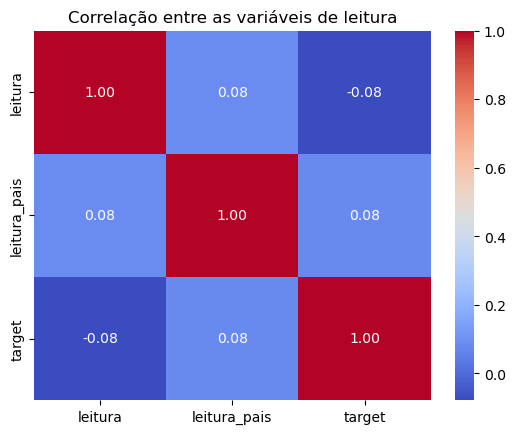

In [75]:
# selecionando colunas de leitura
columns_oi = [col for col in df.columns if 'leitura' in col] + ['target']

# correlação entre as colunas
correlation = df[columns_oi].corr()

# plotando o heatmap
#plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre as variáveis de leitura')
plt.show()

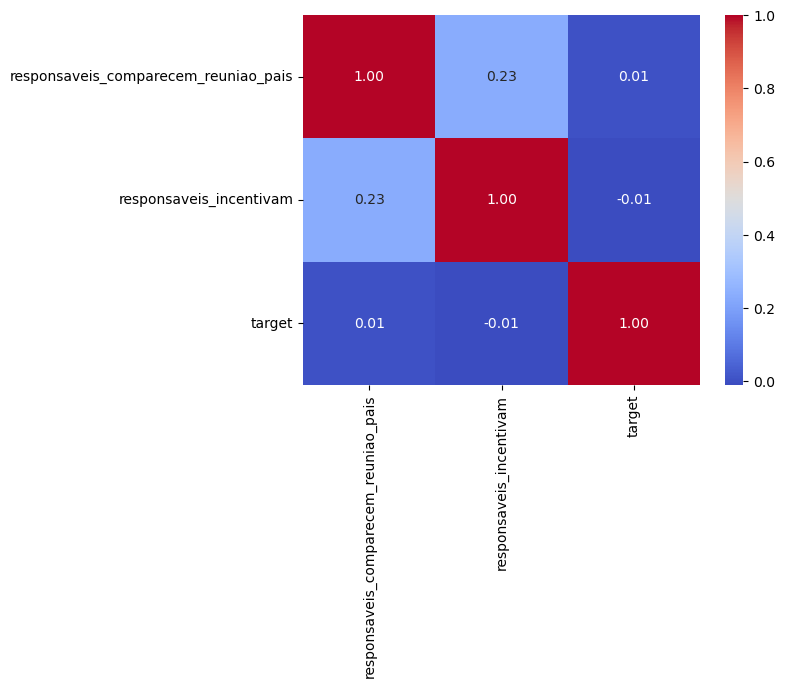

In [76]:
# colunas responsaveis_

columns_oi = [col for col in df.columns if 'responsaveis_' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
#plt.figure(figsize=(10, 10))
plt.show()

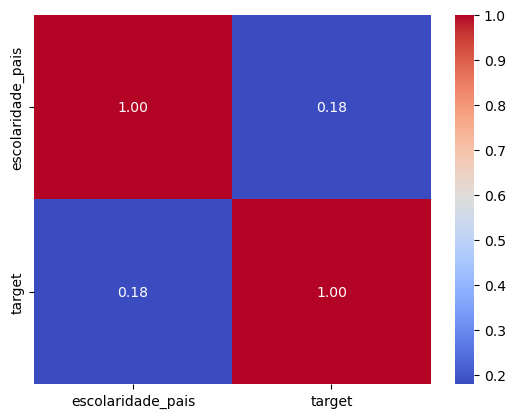

<Figure size 1000x1000 with 0 Axes>

In [77]:
# colunas de escolaridade_mae e escolaridade_mae

columns_oi = [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

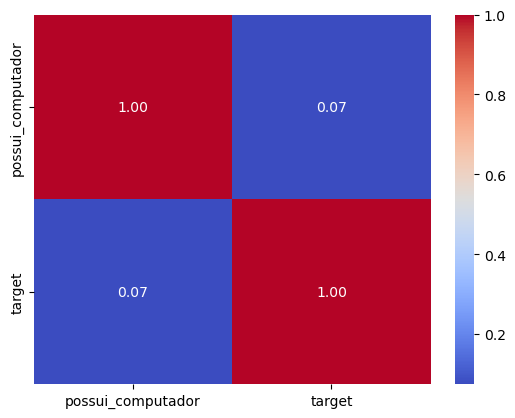

<Figure size 1000x1000 with 0 Axes>

In [78]:
# coluna possui_computador

columns_oi = [col for col in df.columns if 'possui_computador' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

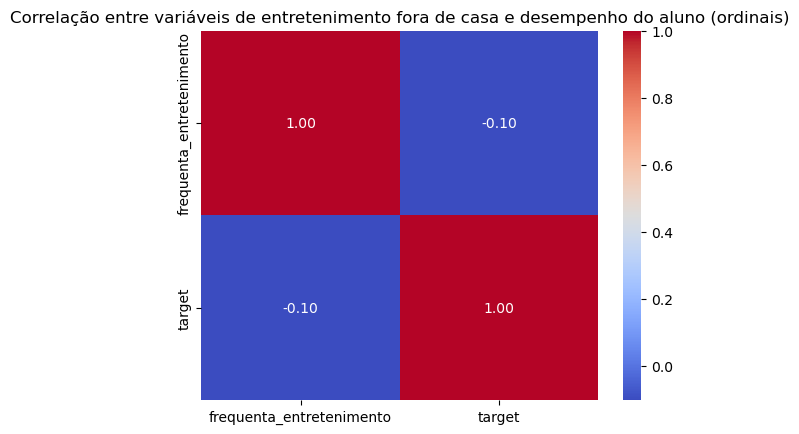

<Figure size 1000x1000 with 0 Axes>

In [79]:
# colunas 'frequenta_'

columns_oi = [col for col in df.columns if 'frequenta_' in col] + ['target']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de entretenimento fora de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

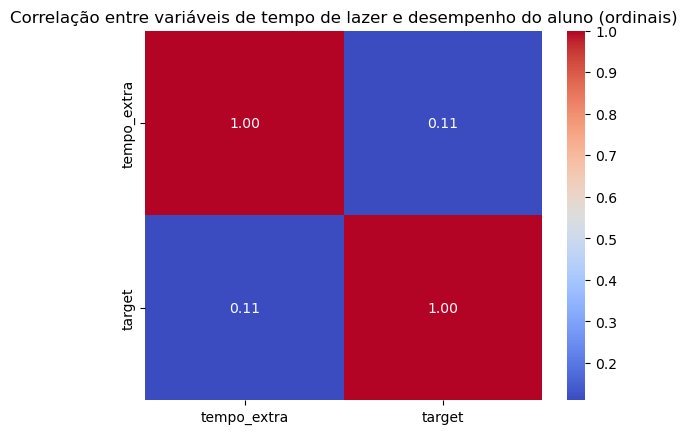

<Figure size 1000x1000 with 0 Axes>

In [80]:
columns_oi_lazer = [col for col in df.columns if 'tempo_' in col] + ['target']

corr = df[columns_oi_lazer].corr()
plt.title('Correlação entre variáveis de tempo de lazer e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

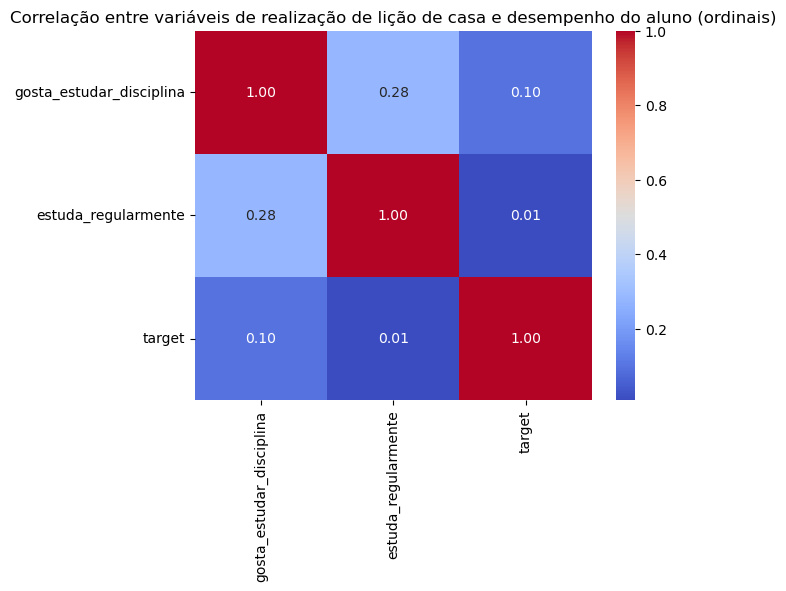

<Figure size 1000x1000 with 0 Axes>

In [81]:
columns_oi_licao = [col for col in df.columns if 'estuda' in col] + ['target']

corr = df[columns_oi_licao].corr()
plt.title('Correlação entre variáveis de realização de lição de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

Index(['pretensao_futura', 'reprovacao', 'possui_tv',
       'evasao_escolar_ate_final_ano', 'idade', 'possui_trabalho',
       'inicio_estudos', 'gosta_estudar_disciplina', 'desempenho_aluno_cat',
       'leitura', 'estuda_regularmente', 'target'],
      dtype='object')


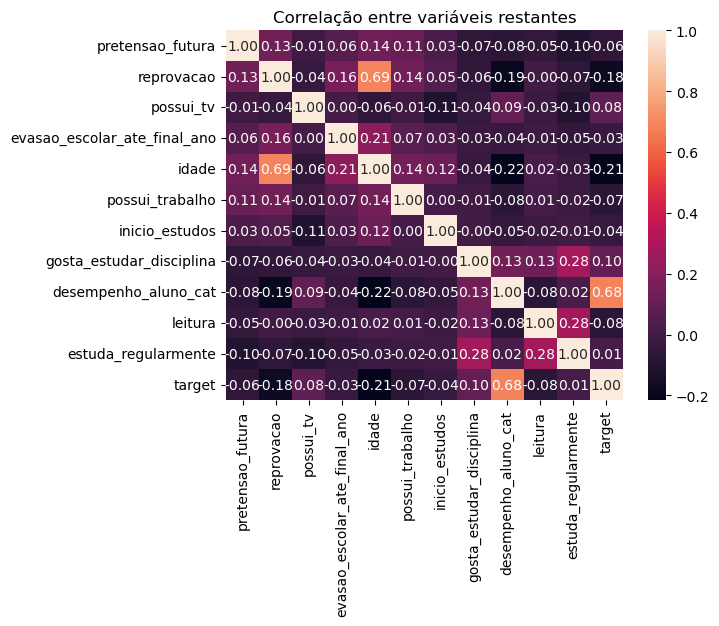

<Figure size 2000x2000 with 0 Axes>

In [82]:
# heatmap for columns relationship
exclude = ['ano', 'escola_publica', 'id_aluno',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'frequenta_' in col]
exclude += ['turno']
exclude += [col for col in df.columns if 'tempo_' in col]
exclude += [col for col in df.columns if 'faz_licao_casa' in col]
exclude += [col for col in df.columns if 'correcao_licao_casa' in col]
exclude += [col for col in df.columns if 'utiliza_biblioteca_escola' in col]
exclude += [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col]
exclude += ['possui_computador']

print(df.drop(exclude, axis=1).columns)

#for column in df.drop(exclude, axis=1).columns:
    #print(column, df[column].unique())

corr = df.drop(exclude, axis=1).corr()
plt.title('Correlação entre variáveis restantes')
sns.heatmap(corr, annot=True, fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()

# using desempenho_aluno

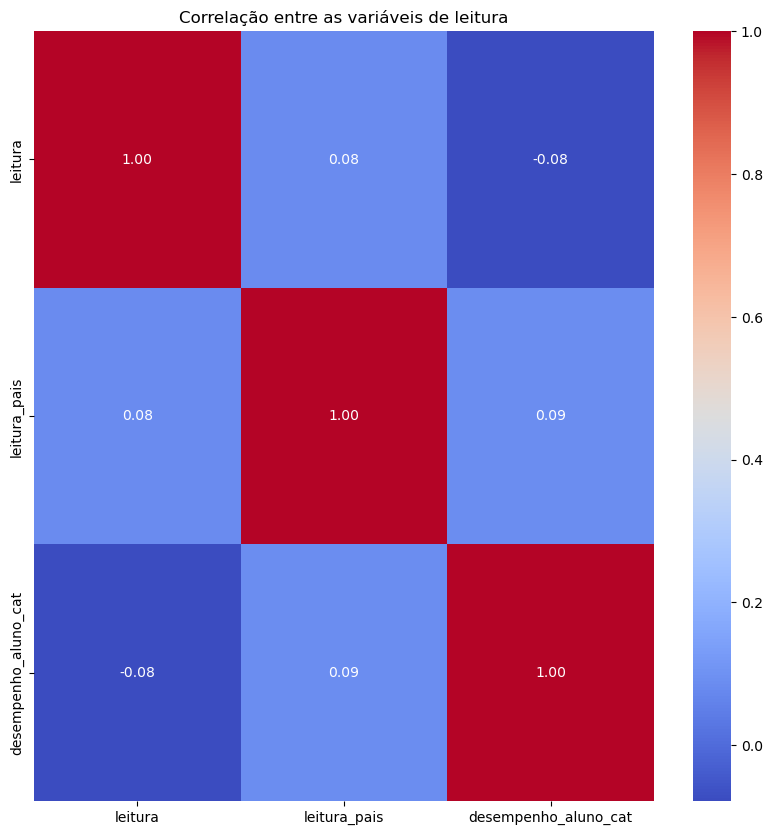

In [83]:
# selecionando colunas de leitura
columns_oi = [col for col in df.columns if 'leitura' in col] + ['desempenho_aluno_cat']

# correlação entre as colunas
correlation = df[columns_oi].corr()

# plotando o heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre as variáveis de leitura')
plt.show()

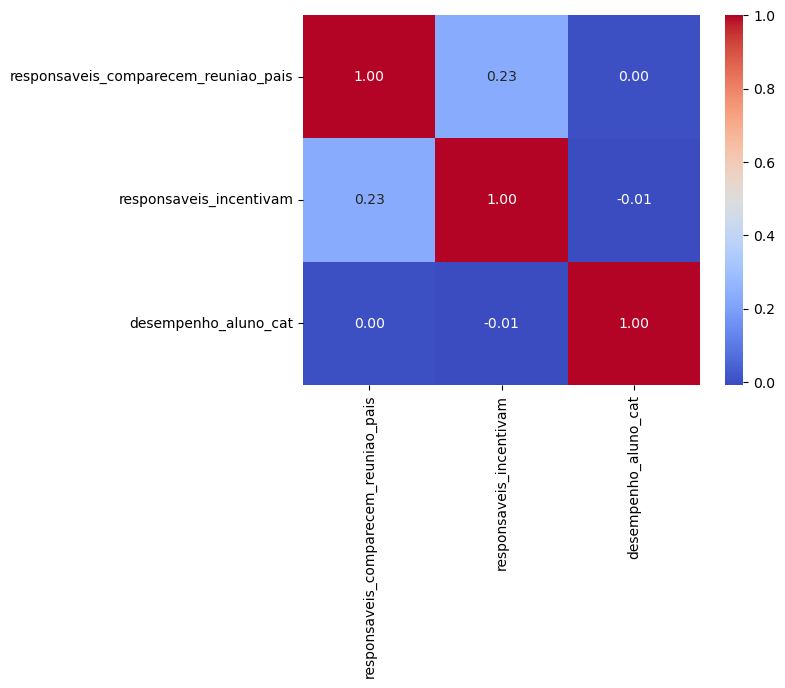

<Figure size 1000x1000 with 0 Axes>

In [84]:
# colunas responsaveis_

columns_oi = [col for col in df.columns if 'responsaveis_' in col] + ['desempenho_aluno_cat']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

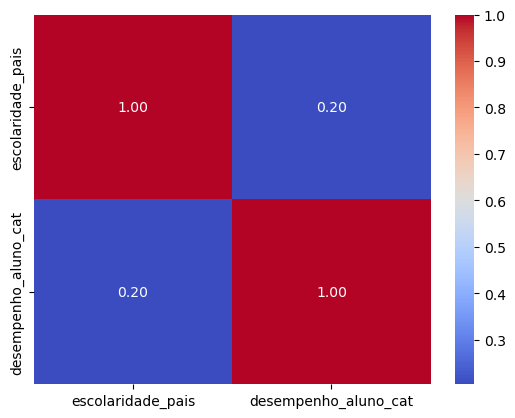

<Figure size 1000x1000 with 0 Axes>

In [85]:
# colunas de escolaridade_mae e escolaridade_mae

columns_oi = [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col] + ['desempenho_aluno_cat']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

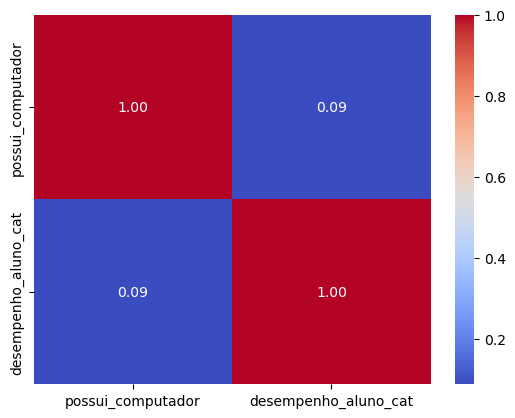

<Figure size 1000x1000 with 0 Axes>

In [86]:
# coluna possui_computador

columns_oi = [col for col in df.columns if 'possui_computador' in col] + ['desempenho_aluno_cat']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

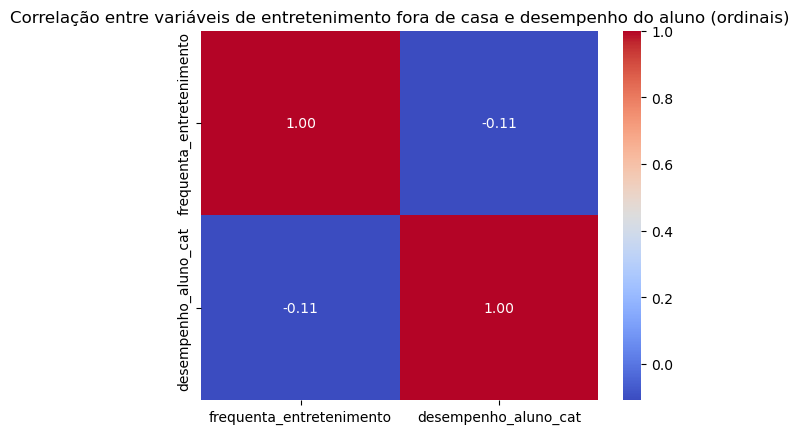

<Figure size 1000x1000 with 0 Axes>

In [87]:
# colunas 'frequenta_'

columns_oi = [col for col in df.columns if 'frequenta_' in col] + ['desempenho_aluno_cat']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de entretenimento fora de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

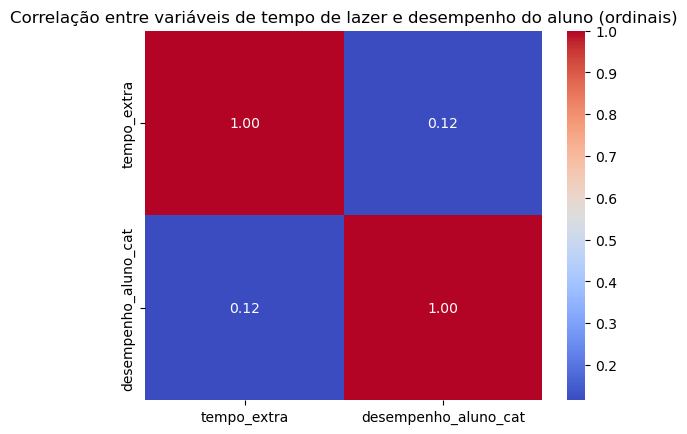

<Figure size 1000x1000 with 0 Axes>

In [88]:
columns_oi_lazer = [col for col in df.columns if 'tempo_' in col] + ['desempenho_aluno_cat']

corr = df[columns_oi_lazer].corr()
plt.title('Correlação entre variáveis de tempo de lazer e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

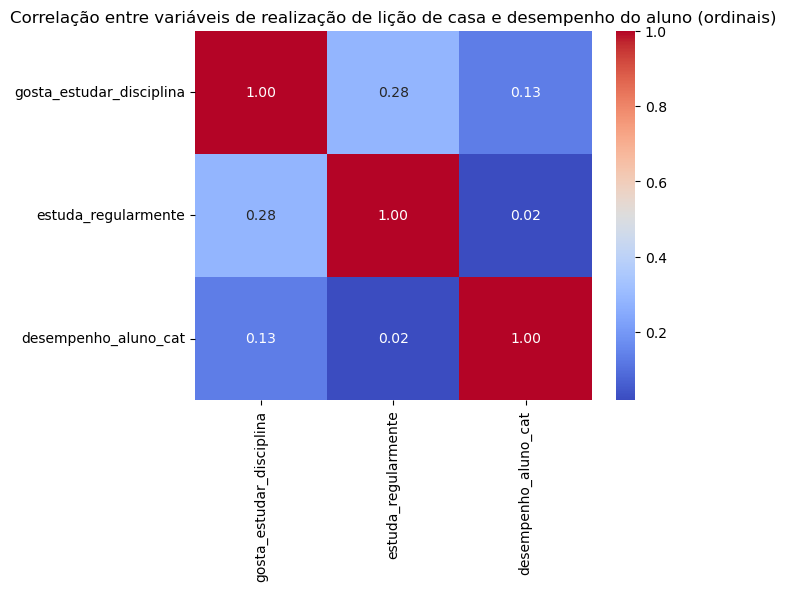

<Figure size 1000x1000 with 0 Axes>

In [89]:
columns_oi_licao = [col for col in df.columns if 'estuda' in col] + ['desempenho_aluno_cat']

corr = df[columns_oi_licao].corr()
plt.title('Correlação entre variáveis de realização de lição de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

Index(['pretensao_futura', 'reprovacao', 'possui_tv',
       'evasao_escolar_ate_final_ano', 'idade', 'possui_trabalho',
       'inicio_estudos', 'gosta_estudar_disciplina', 'desempenho_aluno_cat',
       'leitura', 'estuda_regularmente'],
      dtype='object')


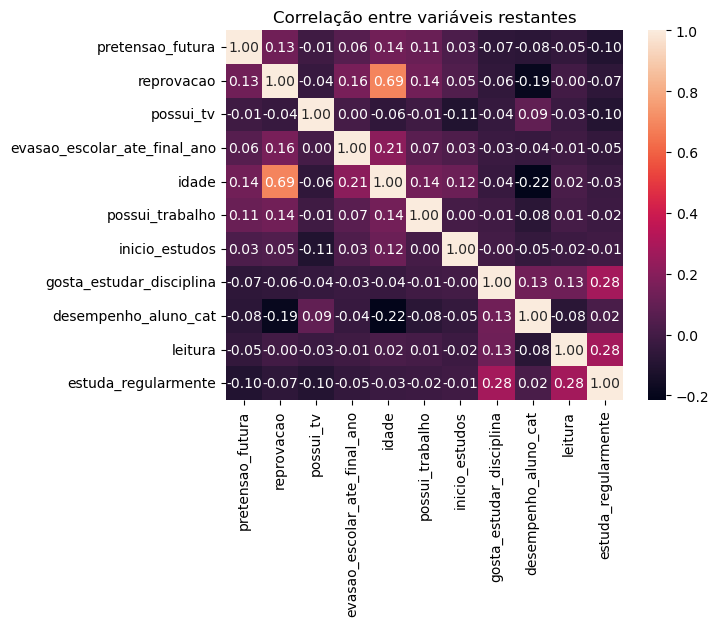

<Figure size 2000x2000 with 0 Axes>

In [90]:
# heatmap for columns relationship
exclude = ['ano', 'escola_publica', 'id_aluno',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'frequenta_' in col]
exclude += ['turno']
exclude += [col for col in df.columns if 'tempo_' in col]
exclude += [col for col in df.columns if 'faz_licao_casa' in col]
exclude += [col for col in df.columns if 'correcao_licao_casa' in col]
exclude += [col for col in df.columns if 'utiliza_biblioteca_escola' in col]
exclude += [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col]
exclude += ['possui_computador']
exclude += ['target']

print(df.drop(exclude, axis=1).columns)

corr = df.drop(exclude, axis=1).corr()
plt.title('Correlação entre variáveis restantes')
sns.heatmap(corr, annot=True, fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()